# Assignment-4
Shubhankar Sharma

## Solution-1

In [4]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.stem import WordNetLemmatizer

# For machine learning-based sentiment analysis
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# For lexicon-based sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
reviews = pd.read_csv('/content/Mental-Health-Twitter.csv')
reviews.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1


In [6]:
reviews = reviews.rename(columns={'Post': 'post_text'})
reviews.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1


In [7]:
display(reviews['post_text'].head())
reviews['post_text'].size

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,post_text
0,It's just over 2 years since I was diagnosed w...
1,"It's Sunday, I need a break, so I'm planning t..."
2,Awake but tired. I need to sleep but my brain ...
3,RT @SewHQ: #Retro bears make perfect gifts and...
4,It’s hard to say whether packing lists are mak...


20000

In [8]:
from nltk.corpus import stopwords

# Remove HTML tags
reviews['post_text'] = reviews['post_text'].apply(lambda x: re.sub('<.*?>', '', str(x)))

# Remove punctuation
reviews['post_text'] = reviews['post_text'].apply(lambda x: re.sub('[^\w\s]', '', x))

# Remove all digits
reviews['post_text'] = reviews['post_text'].apply(lambda x: re.sub(r'\d+', '', x))

# Convert to lowercase
reviews['post_text'] = reviews['post_text'].apply(lambda x: x.lower())

# Tokenize
reviews['post_text'] = reviews['post_text'].apply(lambda x: nltk.word_tokenize(x))

# Remove stopwords
stop_words = set(stopwords.words('english'))
reviews['post_text'] = reviews['post_text'].apply(lambda x: [word for word in x if word not in stop_words])

# Lemmatize
lemmatizer = WordNetLemmatizer()
reviews['post_text'] = reviews['post_text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

display(reviews['post_text'].head(10))
reviews['post_text'].size

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:7: DeprecationWarning: invalid escape sequence '\w'
<>:7: DeprecationWarning: invalid escape sequence '\w'
<ipython-input-8-97d9f3a3b1bc>:7: DeprecationWarning: invalid escape sequence '\w'
  reviews['post_text'] = reviews['post_text'].apply(lambda x: re.sub('[^\w\s]', '', x))


,post_text
0,"[year, since, diagnosed, anxiety, depression, ..."
1,"[sunday, need, break, im, planning, spend, lit..."
2,"[awake, tired, need, sleep, brain, idea]"
3,"[rt, sewhq, retro, bear, make, perfect, gift, ..."
4,"[hard, say, whether, packing, list, making, li..."
5,"[making, packing, list, new, hobby, movinghouse]"
6,"[point, keeping, stuff, nostalgic, reason, cro..."
7,"[currently, findingboxesofrandomshit, packing,..."
8,"[cant, bothered, cook, take, away, way, lazy]"
9,"[rt, itventsnews, itv, release, promo, video, ..."


20000

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

reviews['post_text'] = reviews['post_text'].apply(lambda x: ' '.join(x))

# Define the vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)

# Fit and transform the post_text column
tfidf = tfidf_vectorizer.fit_transform(reviews['post_text'])

# Print the vocabulary size and the first 10 words in the vocabulary
print("Vocabulary size:", len(tfidf_vectorizer.vocabulary_))
print("First 10 words in the vocabulary:", list(tfidf_vectorizer.vocabulary_.keys())[:10])

# Print the shape of the tfidf matrix
print("TF-IDF matrix shape:", tfidf.shape)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Vocabulary size: 31123
First 10 words in the vocabulary: ['year', 'diagnosed', 'anxiety', 'depression', 'today', 'im', 'taking', 'moment', 'reflect', 'far']
TF-IDF matrix shape: (20000, 31123)


In [10]:
import pandas as pd
from textblob import TextBlob


# Create a function to calculate the polarity of each tweet
def calculate_polarity(text):
    return TextBlob(text).sentiment.polarity
    reviews["Polarity"]= reviews['post_text'].apply(calculate_polarity)

# Create a function to calculate the subjectivity of each tweet
def calculate_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity
    reviews["Subjectivity"] = reviews['post_text'].apply(calculate_subjectivity)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
def calculate_polarity(text):
    return TextBlob(text).sentiment.polarity
# Create a new column called "Polarity" and apply the calculate_polarity function to the "Processed" column
reviews["Polarity"] = reviews['post_text'].apply(calculate_polarity)

# Define a function to classify polarities
def analyse_polarity(polarity):
    if polarity > 0:
        return "Positive"
    if polarity == 0:
        return "Neutral"
    if polarity < 0:
        return "Negative"


# Apply the funtion on Polarity column and add the results into a new column
reviews["Label"] = reviews["Polarity"].apply(analyse_polarity)
display(reviews[["Polarity","Label"]].head(20))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Polarity,Label
0,0.100000,Positive
1,-0.093750,Negative
2,-0.400000,Negative
3,0.900000,Positive
4,-0.045833,Negative
5,0.136364,Positive
6,-0.153571,Negative
7,0.000000,Neutral
8,-0.250000,Negative
9,0.000000,Neutral


In [12]:
reviews["Polarity"] = reviews['post_text'].apply(calculate_polarity)
reviews["Label"] = reviews["Polarity"].apply(analyse_polarity)

print(reviews["Label"].value_counts())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Neutral     9823
Positive    6565
Negative    3612
Name: Label, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:518: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:518: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated

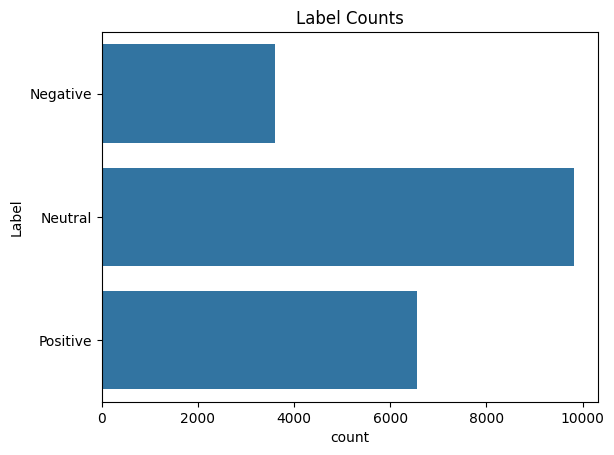

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
# Change the datatype as "category"
reviews["Label"] = reviews["Label"].astype("category")

# Visualize the Label counts
sns.countplot(reviews["Label"])
plt.title("Label Counts")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:518: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:518: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated

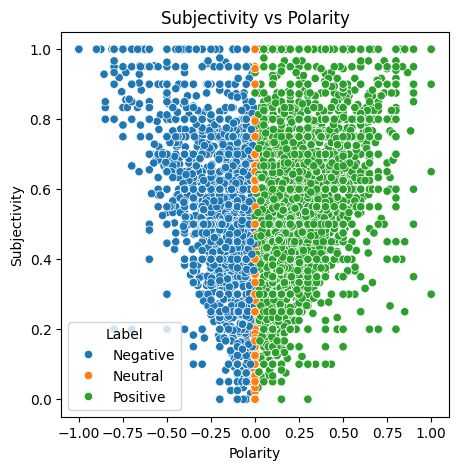

In [14]:
import seaborn as sns
reviews["Subjectivity"] = reviews['post_text'].apply(calculate_subjectivity)

# Visualize the Polarity scores
plt.figure(figsize = (5, 5))
sns.scatterplot(x="Polarity", y="Subjectivity", hue="Label", data=reviews)
plt.title("Subjectivity vs Polarity")
plt.show()

In [15]:
# Import wordcloud
from wordcloud import WordCloud

# Create a new DataFrame called frequencies
frequencies = pd.DataFrame(tfidf.sum(axis=0).T,index=tfidf_vectorizer.get_feature_names_out(),columns=['total frequency'])

# Sort the words by frequency
frequencies.sort_values(by='total frequency',ascending=False, inplace=True)
# Display the most 20 frequent words
display(frequencies.head(20))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,total frequency
rt,469.749906
im,257.104868
like,193.510025
dont,174.442750
depression,169.646384
love,152.867519
know,139.926592
people,125.345990
good,115.753995
time,113.620183


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


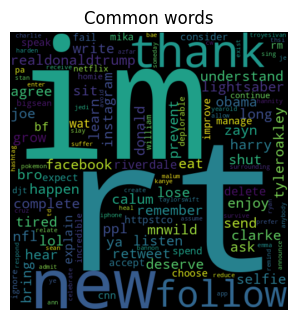

In [16]:
import matplotlib.pyplot as plt

# Join the indexes
frequent_words = " ".join(frequencies.index)+" "

# Initialize the word cloud
wc = WordCloud(width = 500, height = 500, min_font_size =10, max_words=2000, background_color ='black', stopwords= 'english')

# Generate the world clouds for each type of label
nwc = wc.generate(frequent_words)

# Plot the world cloud
plt.figure(figsize = (5, 3), facecolor = None)
plt.imshow(nwc, interpolation="bilinear")
plt.axis("off")
plt.title("Common words")
plt.tight_layout(pad = 0)
plt.show()

In [17]:
reviews.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['Unnamed: 0', 'post_id', 'post_created', 'post_text', 'user_id',
       'followers', 'friends', 'favourites', 'statuses', 'retweets', 'label',
       'Polarity', 'Label', 'Subjectivity'],
      dtype='object')

In [18]:
#SVM
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


# Split data into training and test sets
train_data, test_data = train_test_split(reviews, test_size=0.2, random_state=42)


train_features = tfidf_vectorizer.fit_transform(train_data['post_text'])
test_features = tfidf_vectorizer.transform(test_data['post_text'])

# Create the target variables
train_target = le.fit_transform(train_data['Label'])
test_target = le.transform(test_data['Label'])

# Train the SVM classifier
clf = SVC(kernel='linear')
clf.fit(train_features, train_target)

# Make predictions on the testing data
predictions = clf.predict(test_features)
print(classification_report(test_target,predictions))

# Calculate accuracy
accuracy = accuracy_score(test_target, predictions)
print("Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


              precision    recall  f1-score   support

           0       0.91      0.80      0.85       732
           1       0.87      0.99      0.92      1938
           2       0.95      0.83      0.89      1330

    accuracy                           0.90      4000
   macro avg       0.91      0.87      0.89      4000
weighted avg       0.90      0.90      0.90      4000

Accuracy: 0.898


In [19]:
#LogisticRegression
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Load the data
train_data = reviews
test_data = reviews

# Create the feature matrices
train_features = tfidf_vectorizer.fit_transform(train_data['post_text'])
test_features = tfidf_vectorizer.transform(test_data['post_text'])

# Create the target variables
train_target = le.fit_transform(train_data['Label'])
test_target = le.transform(test_data['Label'])

# Train the logistic regression classifier
clf = LogisticRegression(random_state=42)
clf.fit(train_features, train_target)

# Make predictions on the testing data
predictions = clf.predict(test_features)

print(classification_report(test_target,predictions))
# Print the accuracy score
print("Accuracy:", accuracy_score(test_target, predictions))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


              precision    recall  f1-score   support

           0       0.97      0.80      0.88      3612
           1       0.89      0.99      0.94      9823
           2       0.97      0.89      0.93      6565

    accuracy                           0.92     20000
   macro avg       0.94      0.89      0.91     20000
weighted avg       0.93      0.92      0.92     20000

Accuracy: 0.9244


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
#decision_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Initialize objects
le = LabelEncoder()
tfidf_vectorizer = TfidfVectorizer()

# Assuming 'reviews' is your DataFrame and it has 'post_text' and 'Label' columns.
# Split data into training and test sets
train_data, test_data = train_test_split(reviews, test_size=0.2, random_state=42)

# Vectorize the review content
train_features = tfidf_vectorizer.fit_transform(train_data['post_text'])
test_features = tfidf_vectorizer.transform(test_data['post_text'])

# Create the target variables
train_target = le.fit_transform(train_data['Label'])
test_target = le.transform(test_data['Label'])

# Train the Decision Tree classifier
clf = DecisionTreeClassifier()
clf.fit(train_features, train_target)

# Make predictions on the testing data
predictions = clf.predict(test_features)
print(classification_report(test_target,predictions))

# Calculate accuracy
accuracy = accuracy_score(test_target, predictions)
print("Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


              precision    recall  f1-score   support

           0       0.86      0.84      0.85       732
           1       0.96      0.98      0.97      1938
           2       0.92      0.91      0.91      1330

    accuracy                           0.93      4000
   macro avg       0.92      0.91      0.91      4000
weighted avg       0.93      0.93      0.93      4000

Accuracy: 0.93025


In [21]:
#Random_forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Initialize objects
le = LabelEncoder()
tfidf_vectorizer = TfidfVectorizer()

# Assuming 'reviews' is your DataFrame and it has 'post_text' and 'Label' columns.
# Split data into training and test sets
train_data, test_data = train_test_split(reviews, test_size=0.2, random_state=42)

# Vectorize the review content
train_features = tfidf_vectorizer.fit_transform(train_data['post_text'])
test_features = tfidf_vectorizer.transform(test_data['post_text'])

# Create the target variables
train_target = le.fit_transform(train_data['Label'])
test_target = le.transform(test_data['Label'])

# Train the Random Forest classifier
clf = RandomForestClassifier()
clf.fit(train_features, train_target)

# Make predictions on the testing data
predictions = clf.predict(test_features)
print(classification_report(test_target,predictions))

# Calculate accuracy
accuracy = accuracy_score(test_target, predictions)
print("Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


              precision    recall  f1-score   support

           0       0.92      0.75      0.83       732
           1       0.90      0.99      0.94      1938
           2       0.93      0.89      0.91      1330

    accuracy                           0.91      4000
   macro avg       0.92      0.88      0.89      4000
weighted avg       0.91      0.91      0.91      4000

Accuracy: 0.911


In [22]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Initialize objects
le = LabelEncoder()
tfidf_vectorizer = TfidfVectorizer()

# Assuming 'reviews' is your DataFrame and it has 'post_text' and 'Label' columns.
# Split data into training and test sets
train_data, test_data = train_test_split(reviews, test_size=0.2, random_state=42)

# Vectorize the review content
train_features = tfidf_vectorizer.fit_transform(train_data['post_text'])
test_features = tfidf_vectorizer.transform(test_data['post_text'])

# Create the target variables
train_target = le.fit_transform(train_data['Label'])
test_target = le.transform(test_data['Label'])

# Train the AdaBoost classifier
clf = AdaBoostClassifier(n_estimators=50, learning_rate=1)
clf.fit(train_features, train_target)

# Make predictions on the testing data
predictions = clf.predict(test_features)
print(classification_report(test_target,predictions))

# Calculate accuracy
accuracy = accuracy_score(test_target, predictions)
print("Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


              precision    recall  f1-score   support

           0       0.85      0.57      0.68       732
           1       0.68      0.99      0.80      1938
           2       0.94      0.48      0.63      1330

    accuracy                           0.74      4000
   macro avg       0.82      0.68      0.71      4000
weighted avg       0.80      0.74      0.73      4000

Accuracy: 0.7435


In [23]:
#Native Bayes
# Import the necessary libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Split the data into training and testing sets
train_data = reviews[:8000]
test_data = reviews[8000:]

# Vectorize the training and testing data
train_features = tfidf_vectorizer.fit_transform(train_data['post_text'])
test_features = tfidf_vectorizer.transform(test_data['post_text'])

# Create the target variables
train_target = le.fit_transform(train_data['Label'])
test_target = le.transform(test_data['Label'])

# Train the Naive Bayes classifier
clf = MultinomialNB()
clf.fit(train_features, train_target)

# Make predictions on the testing data
predictions = clf.predict(test_features)

print(classification_report(test_target,predictions))
# Print the accuracy of the classifier
print("Accuracy:", clf.score(test_features, test_target))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


              precision    recall  f1-score   support

           0       0.99      0.15      0.26      2195
           1       0.79      0.86      0.82      6027
           2       0.65      0.87      0.74      3778

    accuracy                           0.73     12000
   macro avg       0.81      0.63      0.61     12000
weighted avg       0.78      0.73      0.70     12000

Accuracy: 0.7344166666666667


In [24]:
reviews.head

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<bound method NDFrame.head of        Unnamed: 0             post_id                    post_created  \
0               0  637894677824413696  Sun Aug 30 07:48:37 +0000 2015   
1               1  637890384576778240  Sun Aug 30 07:31:33 +0000 2015   
2               2  637749345908051968  Sat Aug 29 22:11:07 +0000 2015   
3               3  637696421077123073  Sat Aug 29 18:40:49 +0000 2015   
4               4  637696327485366272  Sat Aug 29 18:40:26 +0000 2015   
...           ...                 ...                             ...   
19995       19995  819336825231773698  Thu Jan 12 00:14:56 +0000 2017   
19996       19996  819334654260080640  Thu Jan 12 00:06:18 +0000 2017   
19997       19997  819334503042871297  Thu Jan 12 00:05:42 +0000 2017   
19998       19998  819334419374899200  Thu Jan 12 00:05:22 +0000 2017   
19999       19999  819334270825197568  Thu Jan 12 00:04:47 +0000 2017   

                                               post_text     user_id  \
0      year since diagnosed anxiety depression today ...  1013187241   
1      sunday need break im planning spend little tim...  1013187241   
2                      awake tired need sleep brain idea  1013187241   
3      rt sewhq retro bear make perfect gift great be...  1013187241   
4      hard say whether packing list making life easi...  1013187241   
...                                                  ...         ...   
19995                    day without sunshine like night  1169875706   
19996  borens law charge ponder trouble delegate doub...  1169875706   
19997  flow chart thoroughly oversold piece program d...  1169875706   
19998                  ship safe harbor never meant stay  1169875706   
19999                       black hole god dividing zero  1169875706   

       followers  friends  favourites  statuses  retweets  label  Polarity  \
0             84      211         251       837         0      1  0.100000   
1             84      211         251       837         1      1 -0.093750   
2             84      211         251       837         0      1 -0.400000   
3             84      211         251       837         2      1  0.900000   
4             84      211         251       837         1      1 -0.045833   
...          ...      ...         ...       ...       ...    ...       ...   
19995        442      230           7   1063601         0      0  0.000000   
19996        442      230           7   1063601         0      0 -0.200000   
19997        442      230           7   1063601         0      0  0.000000   
19998        442      230           7   1063601         0      0  0.500000   
19999        442      230           7   1063601         0      0 -0.166667   

          Label  Subjectivity  
0      Positive      1.000000  
1      Negative      0.750000  
2      Negative      0.700000  
3      Positive      0.875000  
4      Negative      0.370833  
...         ...           ...  
19995   Neutral      0.000000  
19996  Negative      0.200000  
19997   Neutral      0.000000  
19998  Positive      0.500000  
19999  Negative      0.433333  

[20000 rows x 14 columns]>

In [25]:
#LogisticRegression
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Load the data
train_data = reviews
test_data = reviews

# Create the feature matrices
train_features = tfidf_vectorizer.fit_transform(train_data['post_text'])
test_features = tfidf_vectorizer.transform(test_data['post_text'])

# Create the target variables
train_target = le.fit_transform(train_data['Label'])
test_target = le.transform(test_data['Label'])

# Train the logistic regression classifier
clf = LogisticRegression(random_state=42)
clf.fit(train_features, train_target)

# Make predictions on the testing data
predictions = clf.predict(test_features)

print(classification_report(test_target,predictions))
# Print the accuracy score
print("Accuracy:", accuracy_score(test_target, predictions))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


              precision    recall  f1-score   support

           0       0.98      0.81      0.89      3612
           1       0.91      0.99      0.95      9823
           2       0.97      0.93      0.95      6565

    accuracy                           0.94     20000
   macro avg       0.95      0.91      0.93     20000
weighted avg       0.94      0.94      0.94     20000

Accuracy: 0.9403


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


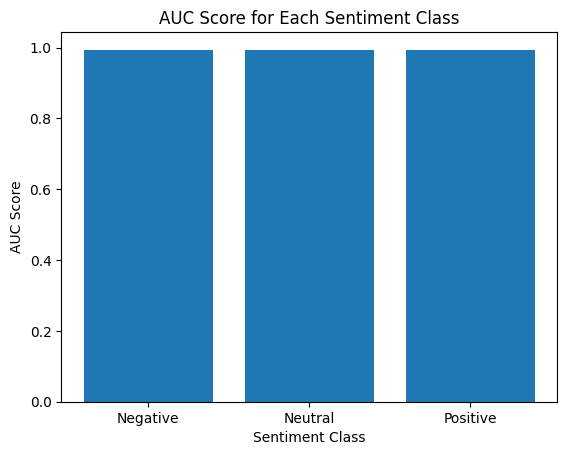

In [26]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the data (replace this with your actual data)
train_data = reviews
test_data = reviews

# Create the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Create the feature matrices
train_features = tfidf_vectorizer.fit_transform(train_data['post_text'])
test_features = tfidf_vectorizer.transform(test_data['post_text'])

# Create the target variables
le = LabelEncoder()
train_target = le.fit_transform(train_data['Label'])
test_target = le.transform(test_data['Label'])

# Train the logistic regression classifier
clf = LogisticRegression(random_state=42, multi_class='ovr')
clf.fit(train_features, train_target)

# Get predicted probabilities for each class
y_prob = clf.predict_proba(test_features)

# Calculate the AUC for each class
auc_scores = []
for class_idx in range(len(le.classes_)):
    class_auc = roc_auc_score(test_target == class_idx, y_prob[:, class_idx])
    auc_scores.append(class_auc)

# Plot the AUC scores for each class
plt.figure()
plt.bar(le.classes_, auc_scores)
plt.xlabel('Sentiment Class')
plt.ylabel('AUC Score')
plt.title('AUC Score for Each Sentiment Class')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


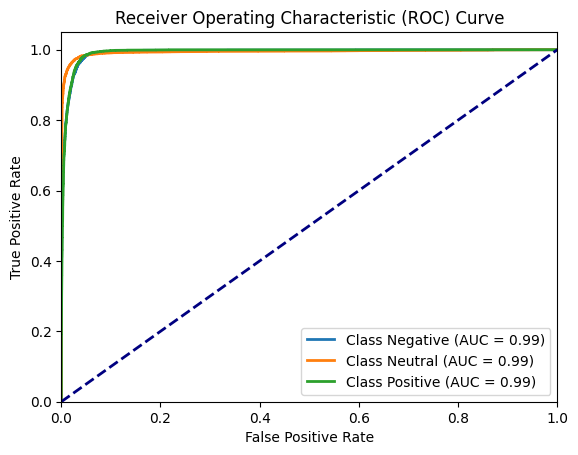

In [27]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the data (replace this with your actual data)
train_data = reviews
test_data = reviews

# Create the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Create the feature matrices
train_features = tfidf_vectorizer.fit_transform(train_data['post_text'])
test_features = tfidf_vectorizer.transform(test_data['post_text'])

# Create the target variables
le = LabelEncoder()
train_target = le.fit_transform(train_data['Label'])
test_target = le.transform(test_data['Label'])

# Train the logistic regression classifier
clf = LogisticRegression(random_state=42, multi_class='ovr')
clf.fit(train_features, train_target)

# Get predicted probabilities for each class
y_prob = clf.predict_proba(test_features)

# Plot the ROC curve for each class
plt.figure()
for class_idx in range(len(le.classes_)):
    fpr, tpr, _ = roc_curve(test_target == class_idx, y_prob[:, class_idx])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {le.classes_[class_idx]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Solution 2 Topic Modelling


In [28]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
df=reviews
df.head()
df.drop(['Unnamed: 0'],axis = 1)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label,Polarity,Label,Subjectivity
0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,year since diagnosed anxiety depression today ...,1013187241,84,211,251,837,0,1,0.100000,Positive,1.000000
1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,sunday need break im planning spend little tim...,1013187241,84,211,251,837,1,1,-0.093750,Negative,0.750000
2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,awake tired need sleep brain idea,1013187241,84,211,251,837,0,1,-0.400000,Negative,0.700000
3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,rt sewhq retro bear make perfect gift great be...,1013187241,84,211,251,837,2,1,0.900000,Positive,0.875000
4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,hard say whether packing list making life easi...,1013187241,84,211,251,837,1,1,-0.045833,Negative,0.370833
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,819336825231773698,Thu Jan 12 00:14:56 +0000 2017,day without sunshine like night,1169875706,442,230,7,1063601,0,0,0.000000,Neutral,0.000000
19996,819334654260080640,Thu Jan 12 00:06:18 +0000 2017,borens law charge ponder trouble delegate doub...,1169875706,442,230,7,1063601,0,0,-0.200000,Negative,0.200000
19997,819334503042871297,Thu Jan 12 00:05:42 +0000 2017,flow chart thoroughly oversold piece program d...,1169875706,442,230,7,1063601,0,0,0.000000,Neutral,0.000000
19998,819334419374899200,Thu Jan 12 00:05:22 +0000 2017,ship safe harbor never meant stay,1169875706,442,230,7,1063601,0,0,0.500000,Positive,0.500000


In [30]:
df['user_id'].nunique()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


72

In [31]:
%pip install emoji
%pip install wordnet

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:

import re
import nltk
import emoji
from nltk.stem.porter import PorterStemmer
#from wordnet import WordNetLemmatizer
#import lemmatizer instead of stemmer
stemmer = PorterStemmer()
#lemmatizer = WordNetLemmatizer()
# Custom Tokenizer
def tokenize(text):
    text = emoji.replace_emoji(text, replace='')
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^\w\s]", "", text)
    tokens = [word for word in nltk.word_tokenize(text) if len(word)>3]
    stems = [stemmer.stem(item) for item in tokens]

    return tokens

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tf = TfidfVectorizer(tokenizer=tokenize, stop_words='english', max_df=0.75, max_features=10000, use_idf=False, norm=None)
tf_vectors = vectorizer_tf.fit_transform(df.post_text)
vectorizer_tf.get_feature_names_out()[100:200]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


array(['addition', 'address', 'adelaide', 'adelaidekane',
       'adelaidekdaily', 'adelena', 'adha', 'adhd', 'adhik_mah',
       'adjective', 'admin', 'administration', 'admire', 'admission',
       'admit', 'admitted', 'admitting', 'adolescent', 'adopt', 'adopted',
       'adorable', 'adore', 'adult', 'adultfi', 'adultfilmproj',
       'adulthood', 'advance', 'advanced', 'advantage', 'adventure',
       'adversity', 'advertised', 'advertising', 'advice', 'advise',
       'advisor', 'advocate', 'adzirahizan', 'aerial', 'afa_gbautism',
       'affect', 'affecting', 'affection', 'affective', 'afford',
       'affordable', 'afifamhrm', 'afraid', 'africa', 'african',
       'afro_thundaaa', 'afspnational', 'afterlife', 'afternoon',
       'againstsuicide', 'aged', 'agency', 'agenda', 'agent',
       'aggressive', 'aging', 'agnes', 'agnes_nangki', 'agree', 'agreed',
       'agrees', 'ahead', 'ahhh', 'ahhhh', 'ahhhhh', 'ahmdariff', 'ailes',
       'ailment', 'aiming', 'aimlessly', 'aint', '

In [34]:
from sklearn import decomposition

# Creating top 25 topics/clusters to get Summary
lda = decomposition.LatentDirichletAllocation(n_components=25, max_iter=10, learning_method='online', learning_offset=50, n_jobs=1, random_state=42)

W1 = lda.fit_transform(tf_vectors)
H1 = lda.components_

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
W1.shape


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(20000, 25)

In [36]:
# Prints top 15 relevant words for each of the 25 topics
num_words = 15

vocab = np.array(vectorizer_tf.get_feature_names_out())

top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_words-1:-1]]
topic_words = ([top_words(t) for t in H1])
topics = [' '.join(t) for t in topic_words]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
topics

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['following real tell morning tonight read problem russia msnbc story isnt joenbc past city disorder',
 'know friend feel realdonaldtrump doesnt positive away cool pain like make dont honestly matter nanny',
 'point team reason finally seen high line highzyl guess power saber save join class piece',
 'depression year today happy come overcome play word getting birthday tomorrow anxiety fake funny lost',
 'life world theyre fucking vote face voting wear nowzayn meetthebatman seriously decided treat brother especially',
 'hello game yeah cute little hair party nigga playing sostumblrx knew break celtic ugly dumb',
 'want right work hope person care live president thinking heart working different favorite worth crazy',
 'like twitter thing best said night thought sleep news haha left stay post dream strong',
 'follow going actually wait start watch week miss month house probably truth looking thehill michael',
 'love great baby yong zaynmalik second movie gopaytwin tilltheend tuesyong gop

In [38]:
# deciding to which topic/cluster the current document belongs to (argmax)

colnames = ["Topic" + str(i) for i in range(lda.n_components)]
docnames = ["Doc" + str(i) for i in range(len(df.post_text))]

df_doc_topic_pos = pd.DataFrame(np.round(W1,2),columns=colnames,index=docnames)
significanttopic = np.argmax(df_doc_topic_pos.values,axis=1)

df_doc_topic_pos['dominant_topic'] = significanttopic

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
# Final feautures

df_doc_topic_pos

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,...,Topic16,Topic17,Topic18,Topic19,Topic20,Topic21,Topic22,Topic23,Topic24,dominant_topic
Doc0,0.00,0.00,0.00,0.90,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3
Doc1,0.12,0.00,0.00,0.00,0.00,0.45,0.00,0.00,0.00,0.00,...,0.12,0.00,0.00,0.00,0.00,0.12,0.00,0.12,0.00,5
Doc2,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.86,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,16
Doc3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.09,...,0.00,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.59,24
Doc4,0.00,0.00,0.00,0.20,0.10,0.00,0.00,0.00,0.00,0.00,...,0.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.20,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Doc19995,0.01,0.01,0.01,0.01,0.01,0.26,0.01,0.51,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,7
Doc19996,0.01,0.01,0.01,0.01,0.01,0.01,0.21,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,12
Doc19997,0.12,0.23,0.12,0.00,0.00,0.00,0.00,0.00,0.12,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.12,1
Doc19998,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.34,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.34,0.01,0.17,7


In [40]:
df_doc_topic_pos.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['Topic0', 'Topic1', 'Topic2', 'Topic3', 'Topic4', 'Topic5', 'Topic6',
       'Topic7', 'Topic8', 'Topic9', 'Topic10', 'Topic11', 'Topic12',
       'Topic13', 'Topic14', 'Topic15', 'Topic16', 'Topic17', 'Topic18',
       'Topic19', 'Topic20', 'Topic21', 'Topic22', 'Topic23', 'Topic24',
       'dominant_topic'],
      dtype='object')

In [41]:
%pip install pyLDAvis
%pip install pandas==1.5.1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  Using cached pandas-2.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (19 kB)
Using cached pandas-2.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.0 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.1
    Uninstalling pandas-1.5.1:
      Successfully uninstalled pandas-1.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 2.2.2 which is incompatible.
  Using cached pandas-1.5.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached pandas-1.5.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uni

In [42]:
import pyLDAvis
import pyLDAvis.lda_model

pyLDAvis.enable_notebook()
pyLDAvis.lda_model.prepare(lda, tf_vectors, vectorizer_tf)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
3      0.001238  0.041778       1        1  5.995663
13    -0.169853 -0.118996       2        1  5.322893
7     -0.249641 -0.004400       3        1  5.253165
1     -0.281745 -0.018259       4        1  4.661352
17    -0.099174  0.084290       5        1  4.612686
6     -0.002245  0.084573       6        1  4.592981
14     0.005913  0.036159       7        1  4.457852
8      0.015081  0.047402       8        1  4.341536
11     0.035794  0.030259       9        1  4.320663
21     0.077985 -0.250696      10        1  4.175761
9      0.061724 -0.232345      11        1  4.033861
18     0.056172  0.028641      12        1  3.791666
0      0.049272 -0.181879      13        1  3.741774
5      0.050719  0.053795      14        1  3.643703
23     0.053604  0.076789      15        1  3.576055
16     0.020110 -0.024646      16        1  3.574645
22     0.045979  0.030916      17        1  3.560466
24     0.049610  0.037133      18        1  3.502865
12     0.051128  0.043595      19        1  3.395569
20     0.042501  0.054661      20        1  3.373255
10     0.048147  0.040431      21        1  3.311946
15     0.052820  0.046459      22        1  3.277684
2     -0.011515  0.030153      23        1  3.235290
19     0.052067  0.027543      24        1  3.145637
4      0.044310  0.036643      25        1  3.101031, topic_info=            Term        Freq       Total Category  logprob  loglift
4454        like  890.000000  890.000000  Default  30.0000  30.0000
2294        dont  751.000000  751.000000  Default  29.0000  29.0000
4260        know  566.000000  566.000000  Default  28.0000  28.0000
5702      people  550.000000  550.000000  Default  27.0000  27.0000
2106  depression  601.000000  601.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
3584        hmmm   16.156002   17.044978  Topic25  -5.2416   3.4199
3055        gain   15.411122   16.300097  Topic25  -5.2888   3.4174
549        audio   15.071707   15.960683  Topic25  -5.3111   3.4161
8713       title   14.837183   15.726158  Topic25  -5.3268   3.4152
9540     website   14.538474   15.427450  Topic25  -5.3471   3.4141

[830 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
18       14  0.959623   aartorias
24       24  0.962491        able
29       17  0.972357  absolutely
37        4  0.956221      accept
49        7  0.983213     account
...     ...       ...         ...
9913      2  0.997672       youre
9924     14  0.962759     youtube
9933     22  0.981179       youve
9962     17  0.991263        zayn
9963     11  0.986567   zaynmalik

[835 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 14, 8, 2, 18, 7, 15, 9, 12, 22, 10, 19, 1, 6, 24, 17, 23, 25, 13, 21, 11, 16, 3, 20, 5])